In [26]:
import numpy as np
import pandas as pd

Cómo combinar medidas de distintos dataframes con diferentes horizontes temporales, pero respetando el intervalo temporal de la menor granularidad.

Es importante que las columnas de fechas tengan formato fecha, y que estén ordenadas de forma creciente.

**Dataset Diario**

In [27]:
# Creación de un dataframe con medida a nivel 'dia'

daily = pd.DataFrame()
daily['day'] = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
daily['medida_diaria'] = np.random.randint(100, 1000, size=len(daily))


In [28]:
daily

,day,medida_diaria
0,2022-01-01,752
1,2022-01-02,770
2,2022-01-03,926
3,2022-01-04,179
4,2022-01-05,403
...,...,...
725,2023-12-27,952
726,2023-12-28,530
727,2023-12-29,506
728,2023-12-30,485


**Dataset Mensual**

In [29]:
# Creación de un dataframe con medida a nivel 'mes'

monthly = pd.DataFrame()
monthly['month'] = pd.date_range(start='2022-01-01', end='2023-12-31', freq='M')
monthly['medida_mensual'] = np.random.randint(1.1, 5.7, size=len(monthly))

In [30]:
monthly

,month,medida_mensual
0,2022-01-31,3
1,2022-02-28,3
2,2022-03-31,1
3,2022-04-30,4
4,2022-05-31,4
5,2022-06-30,3
6,2022-07-31,4
7,2022-08-31,2
8,2022-09-30,4
9,2022-10-31,4


**Dataset Trimestral**

In [31]:
# Creación de un dataframe con medida a nivel 'trimestre'

quarterly = pd.DataFrame()
quarterly['trim'] = pd.date_range(start='2022-01-01', end='2023-12-31', freq='Q')
quarterly['medida_trim'] = np.random.randint(10, 50, size=len(quarterly))

In [32]:
quarterly

,trim,medida_trim
0,2022-03-31,42
1,2022-06-30,12
2,2022-09-30,14
3,2022-12-31,27
4,2023-03-31,23
5,2023-06-30,25
6,2023-09-30,13
7,2023-12-31,46


**Merge de datasets**

In [33]:
# Combinación de dataframes en 2 pasos con la función 'merge_asof'

# merge de dataframe diario y mensual
df_1 = pd.merge_asof(daily, monthly, left_on='day', right_on='month', direction='forward').drop(['month'], axis=1)
# merge de dataframe resultante y trimestal
df_completo = pd.merge_asof(df_1, quarterly, left_on='day', right_on='trim', direction='forward').drop(['trim'], axis=1)

# muestra del dataframe resultante combinado
df_completo

,day,medida_diaria,medida_mensual,medida_trim
0,2022-01-01,752,3,42
1,2022-01-02,770,3,42
2,2022-01-03,926,3,42
3,2022-01-04,179,3,42
4,2022-01-05,403,3,42
...,...,...,...,...
725,2023-12-27,952,4,46
726,2023-12-28,530,4,46
727,2023-12-29,506,4,46
728,2023-12-30,485,4,46


<Axes: >

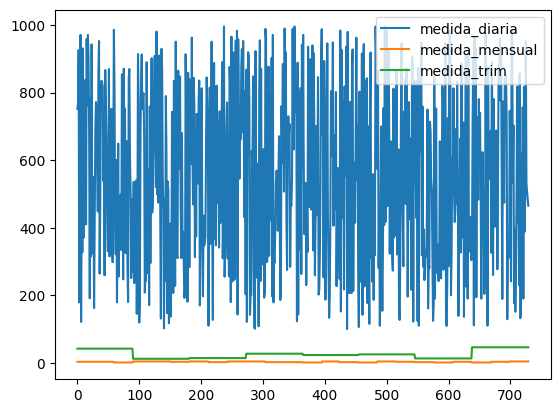

In [34]:
# impresión de las medidas en su horizonte temporal menor
df_completo[['medida_diaria', 'medida_mensual', 'medida_trim']].plot()